### todo

Writing:  
- Rewrite code with new method
    - Each encoder function with two methods: with permutations/swaps or permutation dictionary returned.

In [5]:
import numpy as np
from qrm_matrices import Grm
from qrm_utils import filter_wt, binom_sum
import tequila as tq

def GeneratorQuotient(r1, r2, m):
    """
    Returns G(r1, m)\G(r2, m)
    """
    if r1 == r2 or r1 < r2:
        return []
    G1 = Grm(r1, m)

    G1q = filter_wt(G1, weights = [2**(m-i) for i in range(r2+1, r1+1)])
    return G1q

def RecursiveQRM(r, m):
    if r == m:
        return RecursiveBasisQRM(r, m)
    #U_r_m_1, M1 = RecursiveQRM(r, m-1)

    #form generator matrix and M
    G1 = GeneratorQuotient(r, m-r-1, m)
    G2 = GeneratorQuotient(m-r-1, m-r-2, m-1)
    G2G2 = [np.concatenate([row, row]) for row in G2]
    G = G1 + G2G2
    M = RowIndexList(G)

    #circuits
    circuit = tq.QCircuit()
    k = len(G1)
    circuit += tq.gates.H([k+i for i in range(binom_sum(m-1, m-r-1, m-r-1))])
    print(circuit)

    return G, M


def RecursiveBasisQRM(r, m):
    return

RecursiveQRM(2, 4)

NameError: name 'RowIndexList' is not defined

In [ ]:
from qrm_matrices import Grm
from qrm_utils import puncture_matrix
import numpy as np


G = puncture_matrix(Grm(2, 4))
H = puncture_matrix(Grm(1, 4))[1:]
print(len(G), len(H))
np.array(G)@(np.array(H).T) %2

print(np.linalg.matrix_rank(puncture_matrix(Grm(4, 4))))

11 4
15


In [ ]:
import tequila as tq
from qrm_circuits import get_qubit_partition
from permutations import Permutation, combine_permutations

import numpy as np
from qrm_matrices import Grm
from qrm_utils import filter_wt, binom_sum
import tequila as tq

def RowIndexList(G):
    return {tuple(row): i for i, row in enumerate(G)}

def GeneratorQuotient(r1, r2, m):
    """
    Returns G(r1, m)\G(r2, m)
    """
    if r1 == r2 or r1 < r2:
        return []
    G1 = Grm(r1, m)

    G1q = filter_wt(G1, weights = [2**(m-i) for i in range(r2+1, r1+1)])
    return G1q

def RecursiveBasisQRM(r, m, partitions, qubit_list):
    return

def RecursiveQRM(r, m, partitions = [], qubit_list = None):
    if r == m:
        return RecursiveBasisQRM(r, m, partitions=partitions, qubit_list=qubit_list)
    
    circuit = tq.QCircuit()

    qubit_list1, qubit_list2, partition1, partition2 = get_qubit_partition(m, qubit_list, partitions)

    U1, P1, M1 = RecursiveQRM(r, m-1, partition1, qubit_list1)
    U2, P2, M2 = RecursiveQRM(r, m-1, partition2, qubit_list2)

    #form generator matrix and M
    G1 = GeneratorQuotient(r, m-r-1, m)
    G2 = GeneratorQuotient(m-r-1, m-r-2, m-1)
    G2G2 = [np.concatenate([row, row]) for row in G2]
    G = G1 + G2G2
    M = RowIndexList(G)

    #form permutation and circuit
    G3 = GeneratorQuotient(r, m-r-2, m-1)
    G4 = GeneratorQuotient(r-1, m-r-2, m-1)
    
    p_dict = {}
    for u in G3:
        uu = tuple(np.concatenate([u, u]))
        i = qubit_list[M[uu]]
        p_dict[i] = qubit_list1[M1[u]]
        circuit += tq.gates.CNOT(control=qubit_list1[M1[u]], target=qubit_list2[M2[u]])

    for v in G4:
        i = qubit_list[M[tuple(np.concatenate([np.zeros(2**(m-1)), v]))]]
        p_dict[i] = qubit_list2[M2[v]]
    
    p = Permutation(p_dict)
    P1.update(P2)
    circuit = P1.permute_circuit(circuit=circuit)
    circuit += U1 + U2
    P = combine_permutations([p, P1])
    print(circuit)
    return circuit, P, M

RecursiveQRM(2, 4, qubit_list=list(range(2**4)))

def RecursiveBasisQRM(r, m, qubit_list=[], partitions=[]):
    if qubit_list == []:
        qubit_list = np.zeros(2**m)
    
    ql1, ql2, par1, par2 = get_qubit_partition(m, qubit_list, partitions=partitions)

    if r == m:

    return

6
6
7
7
0
0
8
8
1
1
2
2


NameError: name 'P1' is not defined

In [17]:
import tequila as tq
from permutations import *
from qrm_circuits import get_qubit_partition
from qrm_matrices import Grm
import numpy as np
from qrm_utils import draw_tequila_circuit

def RowIndexList(G):
    return {tuple(row): i for i, row in enumerate(G)}
def RecursiveBasisQRM_m(m, ql = [], partitions=[]):
    if ql == []:
        ql = list(range(2**m))
    if m == 0:
        return tq.QCircuit(), Permutation({ql[0]: ql[0]}), RowIndexList(Grm(0, 0))
    
    ql1, ql2, par1, par2 = get_qubit_partition(m, ql, partitions=partitions)
    
    U1, P1, M1 = RecursiveBasisQRM_m(m-1, ql1, par1)
    U2, P2, M2 = RecursiveBasisQRM_m(m-1, ql2, par2)
    circuit = tq.QCircuit()

    G = Grm(m, m)
    M = RowIndexList(G)
    G1 = Grm(m-1, m-1)

    P = {}
    for row in G1:
        u = tuple(row)
        uu = tuple(np.concatenate([u, u]))
        z = np.zeros(2**(m-1), dtype=int)
        zu = tuple(np.concatenate([z, u]))

        P[ql[M[uu]]] = ql1[M1[u]]
        P[ql[M[zu]]] = ql2[M2[u]]

        circuit += tq.gates.CNOT(control=ql1[M1[u]], target=ql2[M2[u]])
    
    P = Permutation(P)
    P.fill(qubit_list=ql)
    PP = P1 + P2

    circuit = PP.permute_circuit(circuit)
    circuit = circuit + U1 + U2
    P_final = PP * P
    
    return circuit, P_final, M

def RecursiveBasisQRM(r, m, ql = [], partitions=[]):
    """
    Recursive encoder for computational basis states of RM(r, m)
    """
    if ql == []:
        ql = list(range(2**m))
    if r == m:
        return RecursiveBasisQRM_m(m, ql = ql, partitions=partitions) 
    if m == 0:
        return tq.QCircuit(), Permutation({ql[0]: ql[0]}), RowIndexList(Grm(0, 0))
    
    ql1, ql2, par1, par2 = get_qubit_partition(m, ql, partitions=partitions)
    
    U1, P1, M1 = RecursiveBasisQRM(r, m-1, ql1, par1)
    U2, P2, M2 = RecursiveBasisQRM(r, m-1, ql2, par2)
    circuit = tq.QCircuit()

    G = Grm(r, m)
    M = RowIndexList(G)
    G1 = Grm(r, m-1)
    G2 = Grm(r-1, m-1)

    P = {}
    for row in G1:
        u = tuple(row)
        uu = tuple(np.concatenate([u, u]))
        P[ql[M[uu]]] = ql1[M1[u]]
        circuit += tq.gates.CNOT(control=ql1[M1[u]], target=ql2[M2[u]])
    
    for row in G2:
        v = tuple(row)
        z = np.zeros(2**(m-1), dtype=int)
        zv = tuple(np.concatenate([z, v]))
        P[ql[M[zv]]] = ql2[M2[v]]
    
    P = Permutation(P)
    P.fill(qubit_list=ql)
    PP = P1 + P2

    circuit = PP.permute_circuit(circuit)
    circuit = circuit + U1 + U2
    P_final = PP * P

    return circuit, P_final, M

def RecursiveQRM(r, m, ql = [], partitions = []):
    """
    Recursive encoder for QRM(r, m) states
    """
    
    
    return

c, p, m = RecursiveBasisQRM(2, 4)
draw_tequila_circuit(c)

q_0: ──■────────────────────────■────────────────────────■────■────────────
        │                        │                        │  ┌─┴─┐          
 q_1: ──┼────■───────────────────┼────■──────────────■────┼──┤ X ├──────────
        │    │                   │    │              │  ┌─┴─┐└───┘          
 q_2: ──┼────┼────■──────────────┼────┼─────────■────┼──┤ X ├──■────────────
        │    │    │              │    │         │  ┌─┴─┐└───┘┌─┴─┐          
 q_3: ──┼────┼────┼────■─────────┼────┼────■────┼──┤ X ├─────┤ X ├──────────
        │    │    │    │       ┌─┴─┐  │    │    │  └───┘     └───┘          
 q_4: ──┼────┼────┼────┼────■──┤ X ├──┼────┼────┼─────────■────■────────────
        │    │    │    │    │  └───┘┌─┴─┐  │    │         │  ┌─┴─┐          
 q_5: ──┼────┼────┼────┼────┼────■──┤ X ├──┼────┼────■────┼──┤ X ├──────────
        │    │    │    │    │    │  └───┘  │  ┌─┴─┐  │  ┌─┴─┐└───┘          
 q_6: ──┼────┼────┼────┼────┼────┼────■────┼──┤ X ├──┼──┤ X ├──■────────────
        │    │    │    │    │    │    │  ┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐          
 q_7: ──┼────┼────┼────┼────┼────┼────┼──┤ X ├─────┤ X ├─────┤ X ├──────────
      ┌─┴─┐  │    │    │    │    │    │  └───┘     └───┘     └───┘          
 q_8: ┤ X ├──┼────┼────┼────┼────┼────┼────■──────────────■─────────■───────
      └───┘┌─┴─┐  │    │    │    │    │    │              │       ┌─┴─┐     
 q_9: ─────┤ X ├──┼────┼────┼────┼────┼────┼────■─────────┼────■──┤ X ├─────
           └───┘┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐  │  └───┘     
q_10: ──────────┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├──┼────■───────
                └───┘┌─┴─┐  │    │    │    │    │    │  └───┘┌─┴─┐┌─┴─┐     
q_11: ───────────────┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├─────
                     └───┘┌─┴─┐  │    │  ┌─┴─┐  │    │    │  └───┘└───┘     
q_12: ────────────────────┤ X ├──┼────┼──┤ X ├──┼────┼────┼────■─────────■──
                          └───┘┌─┴─┐  │  └───┘┌─┴─┐  │    │    │       ┌─┴─┐
q_13: ─────────────────────────┤ X ├──┼───────┤ X ├──┼────┼────┼────■──┤ X ├
                               └───┘┌─┴─┐     └───┘┌─┴─┐  │  ┌─┴─┐  │  └───┘
q_14: ──────────────────────────────┤ X ├──────────┤ X ├──┼──┤ X ├──┼────■──
                                    └───┘          └───┘┌─┴─┐└───┘┌─┴─┐┌─┴─┐
q_15: ──────────────────────────────────────────────────┤ X ├─────┤ X ├┤ X ├
                                                        └───┘     └───┘└───┘
c: 16/══════════════════════════════════════════════════════════════════════

In [16]:
p

Qubit permutation defined by
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 8
8 -> 9
9 -> 10
10 -> 12
11 -> 7
12 -> 11
13 -> 13
14 -> 14
15 -> 15

In [22]:
from qrm_circuits import QRM_rec_classical_circuit

draw_tequila_circuit(QRM_rec_classical_circuit(2, 4)[0])

q_0: ──■────────────────────────■────────────────────────■────■────────────
        │                        │                        │  ┌─┴─┐          
 q_1: ──┼────■───────────────────┼────■──────────────■────┼──┤ X ├──────────
        │    │                   │    │              │  ┌─┴─┐└───┘          
 q_2: ──┼────┼────■──────────────┼────┼─────────■────┼──┤ X ├──■────────────
        │    │    │              │    │         │  ┌─┴─┐└───┘┌─┴─┐          
 q_3: ──┼────┼────┼────■─────────┼────┼────■────┼──┤ X ├─────┤ X ├──────────
        │    │    │    │       ┌─┴─┐  │    │    │  └───┘     └───┘          
 q_4: ──┼────┼────┼────┼────■──┤ X ├──┼────┼────┼─────────■────■────────────
        │    │    │    │    │  └───┘┌─┴─┐  │    │         │  ┌─┴─┐          
 q_5: ──┼────┼────┼────┼────┼────■──┤ X ├──┼────┼────■────┼──┤ X ├──────────
        │    │    │    │    │    │  └───┘  │  ┌─┴─┐  │  ┌─┴─┐└───┘          
 q_6: ──┼────┼────┼────┼────┼────┼────■────┼──┤ X ├──┼──┤ X ├──■────────────
        │    │    │    │    │    │    │  ┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐          
 q_7: ──┼────┼────┼────┼────┼────┼────┼──┤ X ├─────┤ X ├─────┤ X ├──────────
      ┌─┴─┐  │    │    │    │    │    │  └───┘     └───┘     └───┘          
 q_8: ┤ X ├──┼────┼────┼────┼────┼────┼────■──────────────■─────────■───────
      └───┘┌─┴─┐  │    │    │    │    │    │              │       ┌─┴─┐     
 q_9: ─────┤ X ├──┼────┼────┼────┼────┼────┼────■─────────┼────■──┤ X ├─────
           └───┘┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐  │  └───┘     
q_10: ──────────┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├──┼────■───────
                └───┘┌─┴─┐  │    │    │    │    │    │  └───┘┌─┴─┐┌─┴─┐     
q_11: ───────────────┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├─────
                     └───┘┌─┴─┐  │    │  ┌─┴─┐  │    │    │  └───┘└───┘     
q_12: ────────────────────┤ X ├──┼────┼──┤ X ├──┼────┼────┼────■─────────■──
                          └───┘┌─┴─┐  │  └───┘┌─┴─┐  │    │    │       ┌─┴─┐
q_13: ─────────────────────────┤ X ├──┼───────┤ X ├──┼────┼────┼────■──┤ X ├
                               └───┘┌─┴─┐     └───┘┌─┴─┐  │  ┌─┴─┐  │  └───┘
q_14: ──────────────────────────────┤ X ├──────────┤ X ├──┼──┤ X ├──┼────■──
                                    └───┘          └───┘┌─┴─┐└───┘┌─┴─┐┌─┴─┐
q_15: ──────────────────────────────────────────────────┤ X ├─────┤ X ├┤ X ├
                                                        └───┘     └───┘└───┘
c: 16/══════════════════════════════════════════════════════════════════════

In [7]:
from permutations import *
import tequila as tq

s1 = Permutation.init_from_vector([2, 0, 4])
s2 = Permutation.init_from_vector([1, 2, 0])
concatenate_permutations([s1, s1], [[0, 1, 2], [3, 4, 5]])
print(s1)
print(s2)

s3 = combine_permutations([s1, s1, s1, s1])
print(s3)
circuit = tq.QCircuit()
circuit += tq.gates.H(0)
circuit += tq.gates.X(1)
circuit += tq.gates.Y(2)
s1.permute_circuit(circuit=circuit)

IndexError: list index out of range

In [8]:
s1.fill([0, 1, 2, 3, 4, 6])

In [9]:
s1

Qubit permutation defined by
0 -> 2
1 -> 0
2 -> 4
3 -> 1
4 -> 3
6 -> 6

1
2
3
4
5
6
7
8
1
3
6
10
15
21
28
36
1
4
10
20
35
56
84
120
1
5
15
35
70
126
210
330


Text(0.5, 1.0, 'Column weights for RM(m-2, m) codes')

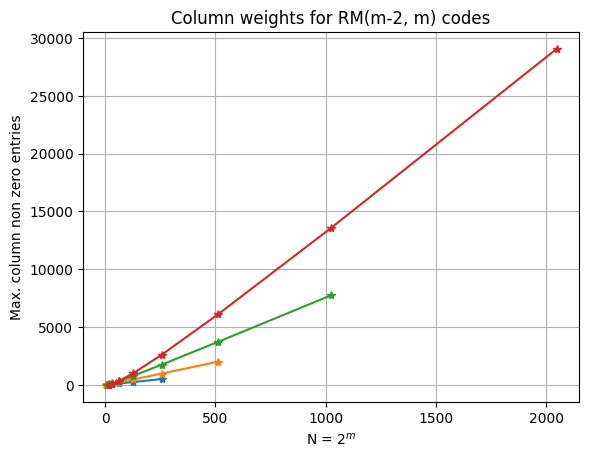

In [20]:
from qrm_matrices import Grm, get_R
import numpy as np
import matplotlib.pyplot as plt

def get_max_row_weight(M):
    row_wts = np.sum(M, axis=1)    
    return max(row_wts)

i, m =  4, 9

mw = {}
tw = {}

for i in range(1, 5):
    col_max_weights = []
    sum_weights = []
    m_list = i + np.array(range(8))
    for m in list(m_list):
        r = m-i
        G = np.array(Grm(r, m))
        R = np.array(get_R(G))
        Gd = R@G %2
        cw = get_max_row_weight(Gd.T)
        #print(get_max_row_weight(Gd))
        print(cw)
        col_max_weights.append(cw)
        sum_weights.append(np.sum(Gd))

    mw[i] = col_max_weights
    tw[i] = sum_weights
    plt.plot([2**m for m in m_list], sum_weights, '*-', label = 'i = {}'.format(i))
plt.xlabel('N = ${2^m}$')
plt.ylabel('Max. column non zero entries')
#plt.xscale('log')
#plt.yscale('log')
plt.grid(True)
plt.title('Column weights for RM(m-2, m) codes')


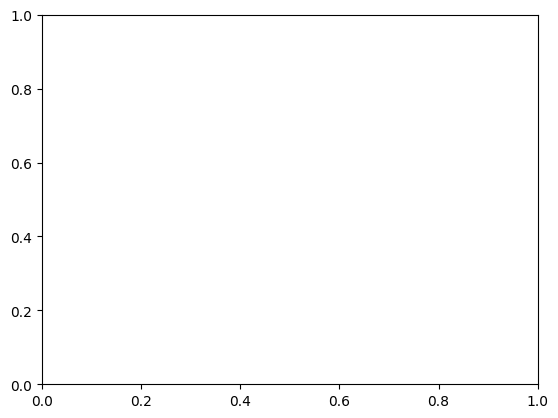

In [19]:
plt.xscale('linear')
plt.yscale('linear')

ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

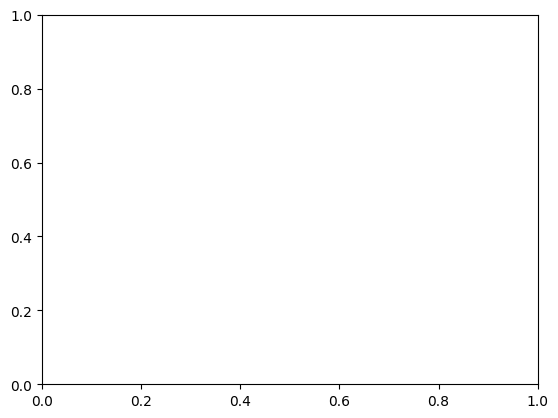

In [10]:
for i in range(2, 4):
    plt.plot([2**m for m in m_list], sum_weights[i], '*-', label = 'i = {}'.format(i))
plt.xlabel('N = ${2^m}$')
plt.ylabel('Total non-zero entries in G')
plt.grid(True)
plt.title('Non zero entries in RM(m-2, m) codes')

In [14]:
mw

{1: [1, 2, 3, 4, 5, 6, 7, 8], 2: [1, 3, 6, 10, 15, 21, 28, 36]}

In [8]:
r, m = 2, 4
G = np.array(Grm(r, m))
R = np.array(get_R(G))
Gd = R@G %2
Gd

array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

In [1]:
#QRM gate counts
#June 27th 2023
import math
import numpy as np
from qrm_counts import *
from qrm_circuits import QRM_rec_circuit, QRM_rec_assym_circuit, QRM_rec_punc_circuit, QRM_rec_assym_punc_circuit
r, m = 7, 10

print(naive_CX_count(r, m))
print(std_CX_count(r, m))
print(rec_CX_count(r, m))

param_list = [(1, 3), (2, 4), (3, 4), (2, 5), (3, 5), (4, 5), (5, 5), (3, 6), (4, 6), (5, 6), (3, 7), (4, 7), (5, 7), (6, 7), (4, 8), (5, 8), (6, 8), (7, 8), (8, 10), (9, 10)]

print(rec_CX_count_assym(2, 5, 2, 5))

for params in param_list:
    r, m = params
    print('\n', r, m)
    print(naive_CX_count(r, m))
    print(std_CX_count(r, m))
    print(rec_CX_count(r, m))
    c, i = QRM_rec_circuit(r, m, only_cnots=True)
    print(len(c.gates))
    c, i = QRM_rec_assym_circuit(r, m, r, m, only_cnots=True)
    print('\n', rec_CX_count_assym(r, m, r, m))
    print(len(c.gates))

    if r < m:
        c, i = QRM_rec_assym_punc_circuit(r, m, r, m, only_cnots=True)
        print('\n', rec_CX_count_assym_punc(r, m, r, m))
        print(len(c.gates))

57880
20664
5096
66

 1 3
16
12
10
10

 10
10

 9
9

 2 4
61
53
30
30

 25
25

 25
25

 3 4
65
29
32
32

 25
25

 31
31

 2 5
176
112
66
66

 66
66

 65
65

 3 5
206
150
78
78

 60
60

 63
63

 4 5
211
61
80
80

 65
65

 79
79

 5 5
211
0
80
80

 80
80

 3 6
614
470
176
176

 154
154

 154
154

 4 6
659
367
190
190

 143
143

 153
153

 5 6
665
125
192
192

 161
161

 191
191

 3 7
1744
960
372
372

 372
372

 371
371

 4 7
1989
1389
430
430

 345
345

 349
349

 5 7
2052
840
446
446

 338
338

 363
363

 6 7
2059
253
448
448

 385
385

 447
447

 4 8
5821
3933
930
930

 837
837

 837
837

 5 8
6213
3605
1004
1004

 767
767

 782
782

 6 8
6297
1857
1022
1022

 789
789

 845
845

 7 8
6305
509
1024
1024

 897
897

 1023
1023

 8 10
58015
8627
5118
5118

 4123
4123

 4369
4369

 9 10
58025
2045
5120
5120

 4609
4609

 5119
5119


In [53]:
#Ed
import tequila
import numpy as np
import sys
sys.setrecursionlimit(10000) 

#determine connectivity of circuit recursively

def connectivity(circuit, n_qubit):
    '''
    Returns (list((control connectivity, target connectivity)), Ed)
    Assuming input circuit with only CNOT gates

    ''' 
    if len(circuit.gates) == 0:
        return [{'x': set(), 'z': set()} for _ in range(n_qubit)], 0
    
    #recursively call
    gate = circuit.gates[0]
    rec_circuit = tequila.QCircuit(gates = circuit.gates[1:])
    conn_res, Ed = connectivity(rec_circuit, n_qubit)

    #add gate
    assert gate.name.lower() == 'x', 'Gate not CNOT, error.'
    assert len(gate.control) == 1, 'Gate has incorrect controls'
    assert len(gate.target) == 1, 'Gate has incorrect targets'
    
    control = gate.control[0]
    target = gate.target[0]

    #combine
    conn_res[control]['x'] = conn_res[control]['x'].union(conn_res[target]['x'])
    conn_res[control]['x'].add(target)
    conn_res[target]['z'] = conn_res[target]['z'].union(conn_res[control]['z'])
    conn_res[target]['z'].add(control)

    Ed = np.average([len(conn_res[i]['x'].union(conn_res[i]['z'])) for i in range(n_qubit)])
    return conn_res, Ed

from qrm_circuits import QRM_rec_circuit, QRM_std_circuit

param_list = [(1, 3), (2, 4), (3, 4), (2, 5), (3, 5), (4, 5), (5, 5), (3, 6), (4, 6), (5, 6), (3, 7), (4, 7), (5, 7), (6, 7), (4, 8), (5, 8), (6, 8), (7, 8), (8, 10), (9, 10)]

for params in param_list:
    r, m = params
    n_qubit = 2**m
    c, i = QRM_rec_circuit(r, m, only_cnots=True)
    d, i = QRM_std_circuit(r, m, only_cnots=True)

    conn_rec, Ed_rec = connectivity(c, n_qubit)
    conn_std, Ed_std = connectivity(d, n_qubit)

    print('r, m: {}, {}\nstd, rec\n{},  {}\n{},  {}\n'.format(r, m, len(d.gates), len(c.gates), Ed_std, Ed_rec))


r, m: 1, 3
std, rec
12,  10
3.375,  3.5

r, m: 2, 4
std, rec
53,  30
7.0625,  7.0

r, m: 3, 4
std, rec
29,  32
4.5,  8.125

r, m: 2, 5
std, rec
112,  66
8.65625,  8.5

r, m: 3, 5
std, rec
150,  78
10.78125,  12.125

r, m: 4, 5
std, rec
61,  80
5.21875,  13.1875

r, m: 5, 5
std, rec
0,  80
0,  13.1875

r, m: 3, 6
std, rec
470,  176
16.734375,  15.875

r, m: 4, 6
std, rec
367,  190
14.53125,  19.75

r, m: 5, 6
std, rec
125,  192
5.84375,  20.78125

r, m: 3, 7
std, rec
960,  372
20.3515625,  18.375

r, m: 4, 7
std, rec
1389,  430
26.0,  26.9375

r, m: 5, 7
std, rec
840,  446
18.3203125,  31.15625

r, m: 6, 7
std, rec
253,  448
6.4140625,  32.171875

r, m: 4, 8
std, rec
3933,  930
37.59765625,  33.5

r, m: 5, 8
std, rec
3605,  1004
36.69921875,  43.625

r, m: 6, 8
std, rec
1857,  1022
22.16796875,  48.25

r, m: 7, 8
std, rec
509,  1024
6.953125,  49.2578125

r, m: 8, 10
std, rec
8627,  5118
30.16015625,  112.328125

r, m: 9, 10
std, rec
2045,  5120
7.986328125,  113.330078125



In [17]:
#playing around with stim

import stim
circuit = stim.Circuit()

# First, the circuit will initialize a Bell pair.
circuit.append("H", [0])
circuit.append("CNOT", [0, 1])
circuit.append("CNOT", [0, 2])
circuit.append("CNOT", [0, 3])


# Then, the circuit will measure both qubits of the Bell pair in the Z basis.
circuit.append("M", [0, 1, 2, 3])
circuit.append("DETECTOR", [stim.target_rec(-1), stim.target_rec(-2), stim.target_rec(-3), stim.target_rec(-4)])
# Let's see the circuit's representation using stim's circuit language:
print(repr(circuit))
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots=10))

from qrm_circuits import QRM_rec_circuit, tequila_to_stim

circ, info = QRM_rec_circuit(3, 4)

st_circuit= tequila_to_stim(circ)
st_circuit.append("DEPOLARIZE2", [0, 1, 2, 3], 0.5)

stim.Circuit('''
    H 0
    CX 0 1 0 2 0 3
    M 0 1 2 3
    DETECTOR rec[-1] rec[-2] rec[-3] rec[-4]
''')
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [6]:
from qrm_circuits import QRM_rec_circuit, get_qubit_partition, QRM_rec_assym_punc_circuit
from qrm_utils import draw_tequila_circuit

c, i = QRM_rec_assym_punc_circuit(1, 3, 1, 3, only_cnots=True)
draw_tequila_circuit(c, justify = 'none')

┌───┐                         
q_0: ────────────■──┤ X ├─────────────────────────
               ┌─┴─┐└─┬─┘                         
q_1: ───────■──┤ X ├──┼────■──────────────────────
            │  └───┘  │  ┌─┴─┐                    
q_2: ──■────┼─────────■──┤ X ├────────────────────
       │    │            └───┘                    
q_3: ──┼────┼───────────────────■─────────■───────
     ┌─┴─┐  │                   │       ┌─┴─┐     
q_4: ┤ X ├──┼───────────────────┼────■──┤ X ├─────
     └───┘┌─┴─┐               ┌─┴─┐  │  └───┘     
q_5: ─────┤ X ├───────────────┤ X ├──┼─────────■──
          └───┘               └───┘┌─┴─┐     ┌─┴─┐
q_6: ──────────────────────────────┤ X ├─────┤ X ├
                                   └───┘     └───┘
c: 7/═════════════════════════════════════════════

In [6]:
from qrm_counts import rec_CX_count_assym_punc
from qrm_circuits import QRM_rec_assym_punc_circuit
param_list = [(1, 3), (1, 4), (2, 5), (2, 6), (2, 7)]
for param in param_list:
    r, m = param
    a = rec_CX_count_assym_punc(r, m, r, m, state_prep=True)
    b = rec_CX_count_assym_punc(r, m, r, m, state_prep=False)

    #check with circuits
    c1, i1 = QRM_rec_assym_punc_circuit(r, m, r, m, state_prep=True, only_cnots=False)
    c2, i2 = QRM_rec_assym_punc_circuit(r, m, r, m, state_prep=False, only_cnots=False)
    
    '''if a != len(c1.gates):
        print('Somethings off')
    if b != len(c2.gates):
        print('Somethings off')'''
    
    print('r: {} m: {}, |0>: {}, D:{} |+>: {}, D:{}'.format(r, m, a, c1.depth, b, c2.depth))

r: 1 m: 3, |0>: 8, D:4 |+>: 9, D:5
r: 1 m: 4, |0>: 22, D:5 |+>: 24, D:6
r: 2 m: 5, |0>: 63, D:6 |+>: 65, D:10
r: 2 m: 6, |0>: 150, D:7 |+>: 153, D:11
r: 2 m: 7, |0>: 332, D:8 |+>: 336, D:12


In [19]:
from qrm_circuits import QRM_rec_punc_circuit
from qrm_utils import get_qiskit_circuit
from qrm_counts import rec_CX_count_punc
import tequila
r, m = 4, 5
c, i = QRM_rec_punc_circuit(r, m, state_prep=False)
d = get_qiskit_circuit(c)
from qrm_utils import draw_tequila_circuit
#print(tequila.simulate(c))
draw_tequila_circuit(c)

┌───┐                                                                 
 q_0: ──■────────────────────────────────────────────■────────────────────────■──────────────■──┤ X ├─────────────────────────────────────────────────────────────────
        │                                            │                        │            ┌─┴─┐└─┬─┘                                                                 
 q_1: ──┼─────────■──────────────────────────────────┼─────────■──────────────┼─────────■──┤ X ├──┼────■──────────────────────────────────────────────────────────────
        │         │                                  │         │              │         │  └───┘  │  ┌─┴─┐┌───┐                                                       
 q_2: ──┼────■────┼──────────────────────────────────┼────■────┼──────────────┼────■────┼─────────■──┤ X ├┤ X ├───────────────────────────────────────────────────────
        │    │    │                                  │    │    │            ┌─┴─┐  │    │            └───┘└─┬─┘                                                       
 q_3: ──┼────┼────┼─────────■────────────────────────┼────┼────┼─────────■──┤ X ├──┼────┼────■──────────────┼─────────■───────────────────────────────────────────────
        │    │    │         │                        │    │    │         │  └───┘┌─┴─┐  │    │              │       ┌─┴─┐                                             
 q_4: ──┼────┼────┼─────────┼────■───────────────────┼────┼────┼─────────┼────■──┤ X ├──┼────┼──────────────┼────■──┤ X ├─────────────────────────────────────────────
        │    │    │         │    │                   │    │    │         │    │  └───┘┌─┴─┐┌─┴─┐            │    │  └───┘                                             
 q_5: ──┼────┼────┼─────────┼────┼────■──────────────┼────┼────┼─────────┼────┼────■──┤ X ├┤ X ├────────────┼────┼────■───────────────────────────────────────────────
        │    │    │         │    │    │              │    │    │         │    │    │  └───┘└───┘            │  ┌─┴─┐┌─┴─┐┌───┐                                        
 q_6: ──┼────┼────┼────■────┼────┼────┼──────────────┼────┼────┼────■────┼────┼────┼────────────────────────■──┤ X ├┤ X ├┤ X ├────────────────────────────────────────
        │    │    │    │    │    │    │            ┌─┴─┐  │    │    │    │    │    │                           └───┘└───┘└─┬─┘                                        
 q_7: ──┼────┼────┼────┼────┼────┼────┼─────────■──┤ X ├──┼────┼────┼────┼────┼────┼────■──────────────■───────────────────┼──────────────■───────────────────────────
        │    │    │    │    │    │    │         │  └───┘┌─┴─┐  │    │    │    │    │    │              │                   │            ┌─┴─┐                         
 q_8: ──┼────┼────┼────┼────┼────┼────┼─────────┼────■──┤ X ├──┼────┼────┼────┼────┼────┼────■─────────┼───────────────────┼─────────■──┤ X ├─────────────────────────
        │    │    │    │    │    │    │         │    │  └───┘┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐                 │         │  └───┘                         
 q_9: ──┼────┼────┼────┼────┼────┼────┼─────────┼────┼────■──┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├─────────────────┼─────────┼────■───────────────────────────
        │    │    │    │    │    │    │         │    │    │  └───┘┌─┴─┐  │    │    │    │    │    │  └───┘                 │       ┌─┴─┐┌─┴─┐                         
q_10: ──┼────┼────┼────┼────┼────┼────┼─────────┼────┼────┼────■──┤ X ├──┼────┼────┼────┼────┼────┼────────────────────────┼────■──┤ X ├┤ X ├─────────────────────────
        │    │    │    │    │    │    │         │    │    │    │  └───┘┌─┴─┐  │    │  ┌─┴─┐  │    │                        │    │  └───┘└───┘                         
q_11: ──┼────┼────┼────┼────┼────┼────┼─────────┼────┼────┼────┼────■──┤ X ├──┼────┼──┤ X ├──┼────┼────■───────────────────┼────┼─────────■───────────────────────────
        │    │    │    │    │    │    │         │    │    │    │    │  └───┘┌─┴─┐  │  └─

In [10]:
from qrm_matrices import Grm

G = Grm(2, 4)
for a in G:
    a_s = '{}'.format(a[0])
    for i, b in enumerate(a[1:]):
        if (i+1) % 4 == 0:
            a_s += ' & '
        a_s += '{}'.format(b)
    a_s += '\\\\'
    print(a_s)

1111 & 1111 & 1111 & 1111\\
0101 & 0101 & 0101 & 0101\\
0011 & 0011 & 0011 & 0011\\
0001 & 0001 & 0001 & 0001\\
0000 & 1111 & 0000 & 1111\\
0000 & 0101 & 0000 & 0101\\
0000 & 0011 & 0000 & 0011\\
0000 & 0000 & 1111 & 1111\\
0000 & 0000 & 0101 & 0101\\
0000 & 0000 & 0011 & 0011\\
0000 & 0000 & 0000 & 1111\\


In [2]:
from qrm_matrices import get_QRM_generator
from qrm_utils import *

def get_QRM_punc_generator(C1_params: tuple, C2_params: tuple):
    G2perp, G1q = get_QRM_generator(C1_params=C1_params, C2_params=C2_params)
    G2perpt = puncture_matrix(G2perp)
    G1qp = puncture_matrix(G1q)
    print(G2perpt)
    G2perpp = []
    for row in G2perpt:
        if np.sum(row) != len(row):
            G2perpp.append(row)
        else:
            G1qp.append(row)
    return (G2perpp, G1qp)

get_QRM_punc_generator((2, 4), (2, 4))

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]


([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]],
 [[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
  [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])